# Average Bubble

In [1]:
cd '/home/dpirvu/project/paper_prefactor/'

/home/dpirvu/project/paper_prefactor


In [2]:
import os,sys
sys.path.append('/home/dpirvu/project/paper_prefactor/bubble_codes/')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
print(sys.path)
from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera
from matplotlib.colors import LogNorm

%matplotlib inline

['/home/dpirvu/project/paper_prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/project/paper_prefactor/bubble_codes/']
['/home/dpirvu/project/paper_prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/project/paper_prefactor/bubble_codes/']


In [3]:
case = 'minus'
general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general

tmp = 0

general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general

maxSim = (1000 if tmp == 0 else 2000 if tmp==1 else 3000 if tmp==2 else 2000)
nTimeMAX = (262144 if tmp!=1 else 131072)

temp, m2, sigmafld = get_model(*general, tmp)
exp_params = [nLat, m2, temp]
print('Experiment', exp_params)

Experiment [2048, 0.85, 0.1]


In [4]:
print('Looking at at T, m2, sigma:', temp, m2, sigmafld)

crit_radList    = np.array(np.linspace(10, 25, 4), dtype='int'); print(crit_radList)
crit_threshList = right_Vmax + np.linspace(0.8, 3, 4) * sigmafld
crit_threshList = np.array([round(ii, 3) for ii in crit_threshList]); print(crit_threshList)

win = 250
plots = False
get_data = True
get_averaged = True

if get_data:
    path = decay_times_file(*exp_params, minSim, maxSim, nTimeMAX)
    if os.path.exists(path):
        decay_times = np.load(path)

        minDecTime = 256
        alltimes   = decay_times[:,1]
        simList2Do = decay_times[alltimes>=minDecTime, 0]
    print('simList2Do', simList2Do)

    all_data = []
    for sim in range(minSim, maxSim):  
        path2RESTsim = rest_sim_location(*exp_params, sim)
        if os.path.exists(path2RESTsim):
            sim, bubble, totbeta = np.load(path2RESTsim, allow_pickle=True)

#             real = np.copy(bubble)
#             real = np.abs(real[0])
#             real = gaussian_filter(real, 1, mode='nearest')
#             nT, nN = np.shape(real)
#             tcen, xcen = find_nucleation_center(real, phieq, 2.7, 30)
#             t, x = np.linspace(-tcen, nT-1-tcen, nT), np.linspace(-xcen, nN-1-xcen, nN)

#             test = bubble[0, tcen, xcen-50:xcen+50]
#             if np.nanmean(test) < 0:
#                 bubble = - bubble

            all_data.append(np.array([sim, bubble]))
            if len(all_data) > 300:
                break
    print('Total bubbles included:', len(all_data))

if get_averaged:
    for cind, cth in enumerate(crit_radList):
        for tind, tsh in enumerate(crit_threshList):
            path = average_file(*exp_params)+'_critrad'+str(cth)+'_crittsh'+str(tsh)+'.npy'
            if os.path.exists(path): continue

            stacks  = stack_bubbles(all_data, win, phieq, tsh, cth, plots)
            avstack = average_stacks(stacks, win, normal, plots=False)
            #except:
            #    print('Skipped cind, tind', cind, tind)
            #    continue
            np.save(path, avstack)
            print('Done cind, tind', cind, tind)

Looking at at T, m2, sigma: 0.1 0.85 0.23030938081773686
[10 15 20 25]
[1.185 1.353 1.522 1.691]
simList2Do [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219

/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Total bubbles included: 277
251 simulations for this combination.


/home/dpirvu/project/paper_prefactor/bubble_codes/bubble_tools.py:556: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(whole_bubble, axis=0)
/home/dpirvu/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Done cind, tind 0 1
252 simulations for this combination.
Done cind, tind 0 2
250 simulations for this combination.
Done cind, tind 1 1
256 simulations for this combination.
Done cind, tind 1 2
252 simulations for this combination.
Done cind, tind 2 1
255 simulations for this combination.
Done cind, tind 2 2
254 simulations for this combination.
Done cind, tind 3 1
257 simulations for this combination.
Done cind, tind 3 2


Looking at at T, m2, sigma: 0.1 0.85 0.23030938081773686


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


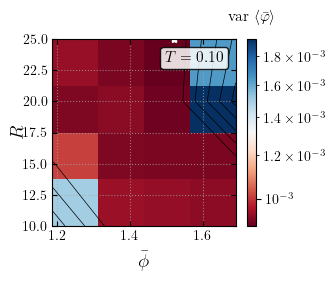

In [5]:
print('Looking at at T, m2, sigma:', temp, m2, sigmafld)
get_plotcomp = True

delt1 = 80

if get_plotcomp:
    varmat  = np.zeros((len(crit_radList), len(crit_threshList)))
    for cind, cth in enumerate(crit_radList):
        for tind, tsh in enumerate(crit_threshList):
            bubble = np.load(average_file(*exp_params)+'_critrad'+str(cth)+'_crittsh'+str(tsh)+'.npy')
            bubble[bubble==0.] = 'nan'

            bubble2measure = np.abs(bubble[0,0])
            nT, nN = np.shape(bubble2measure)
#             for crit_rad in crit_radList:
#                 for crit_thresh in crit_threshList:
#                     tcen, xcen = find_nucleation_center(bubble2measure, phieq, crit_thresh, crit_rad)
#                     tcen -= 35
#                     tl,tr = max(0, tcen-delt1), min(nT, tcen+delt1+1)
#                     xl,xr = max(0, xcen-delt1), min(nN, xcen+delt1+1)

#                     err_f = bubble[1, 0][tl:tr,xl:xr]  #field variance
#                     err_m = bubble[1, 1][tl:tr,xl:xr]  #momentum variance
#                     varmat[cind, tind] += np.nanmean(np.abs(err_f))
            tcen, xcen = find_nucleation_center(bubble2measure, phieq, tsh, cth)
            tcen -= 35
            tl,tr = max(0, tcen-delt1), min(nT, tcen+delt1+1)
            xl,xr = max(0, xcen-delt1), min(nN, xcen+delt1+1)

            err_f = bubble[1, 0][tl:tr,xl:xr]  #field variance
            err_m = bubble[1, 1][tl:tr,xl:xr]  #momentum variance
            varmat[cind, tind] += np.nanmean(np.abs(err_f))

    colmin, rowmin = np.where(varmat == np.nanmin(varmat))
    final_crit_rad = crit_radList[colmin][0]
    final_crit_thresh = crit_threshList[rowmin][0]

    fig, ax = plt.subplots(1,1, figsize = (3.5,3))
    ext = [crit_threshList[0], crit_threshList[-1], crit_radList[0], crit_radList[-1]]

    im0 = plt.imshow(varmat, interpolation=None, norm=LogNorm(), extent=ext, aspect='auto', origin='lower', cmap='RdBu')
    clb = plt.colorbar(im0)
    clb.ax.set_title(r'${\rm var} \, \left< \bar{\varphi} \right> $', size=11, horizontalalignment='center', verticalalignment='bottom')
    clb.ax.yaxis.set_offset_position('right')                         
    plt.plot(final_crit_thresh, final_crit_rad, color='white', marker='*')
    #plt.plot(final_crit_thresh + 0.5*(crit_threshList[1]-crit_threshList[0]), final_crit_rad + 0.5*(crit_radList[1]-crit_radList[0]), color='white', marker='*')

    xx, yy = np.meshgrid(crit_threshList, crit_radList)
    ax.contour(xx,yy,np.abs(np.log(varmat)), levels=6, aspect='auto', interpolation='gaussian', extent=ext, origin='lower', colors='k', linewidths=0.5)

    ax.set_ylabel(r'$R$')
    ax.set_xlabel(r'$\bar{\phi}$')
    beautify(ax, times=-90)
    ax.legend(title=r'$T = {:.2f}$'.format(temp), labelspacing=0., frameon='true', facecolor='white', framealpha=0.85, edgecolor='k', borderpad=0.3)
    fig.tight_layout()
    plt.savefig('./plots/residual_averaging_T'+str(temp)+'.pdf')
    plt.show()

80


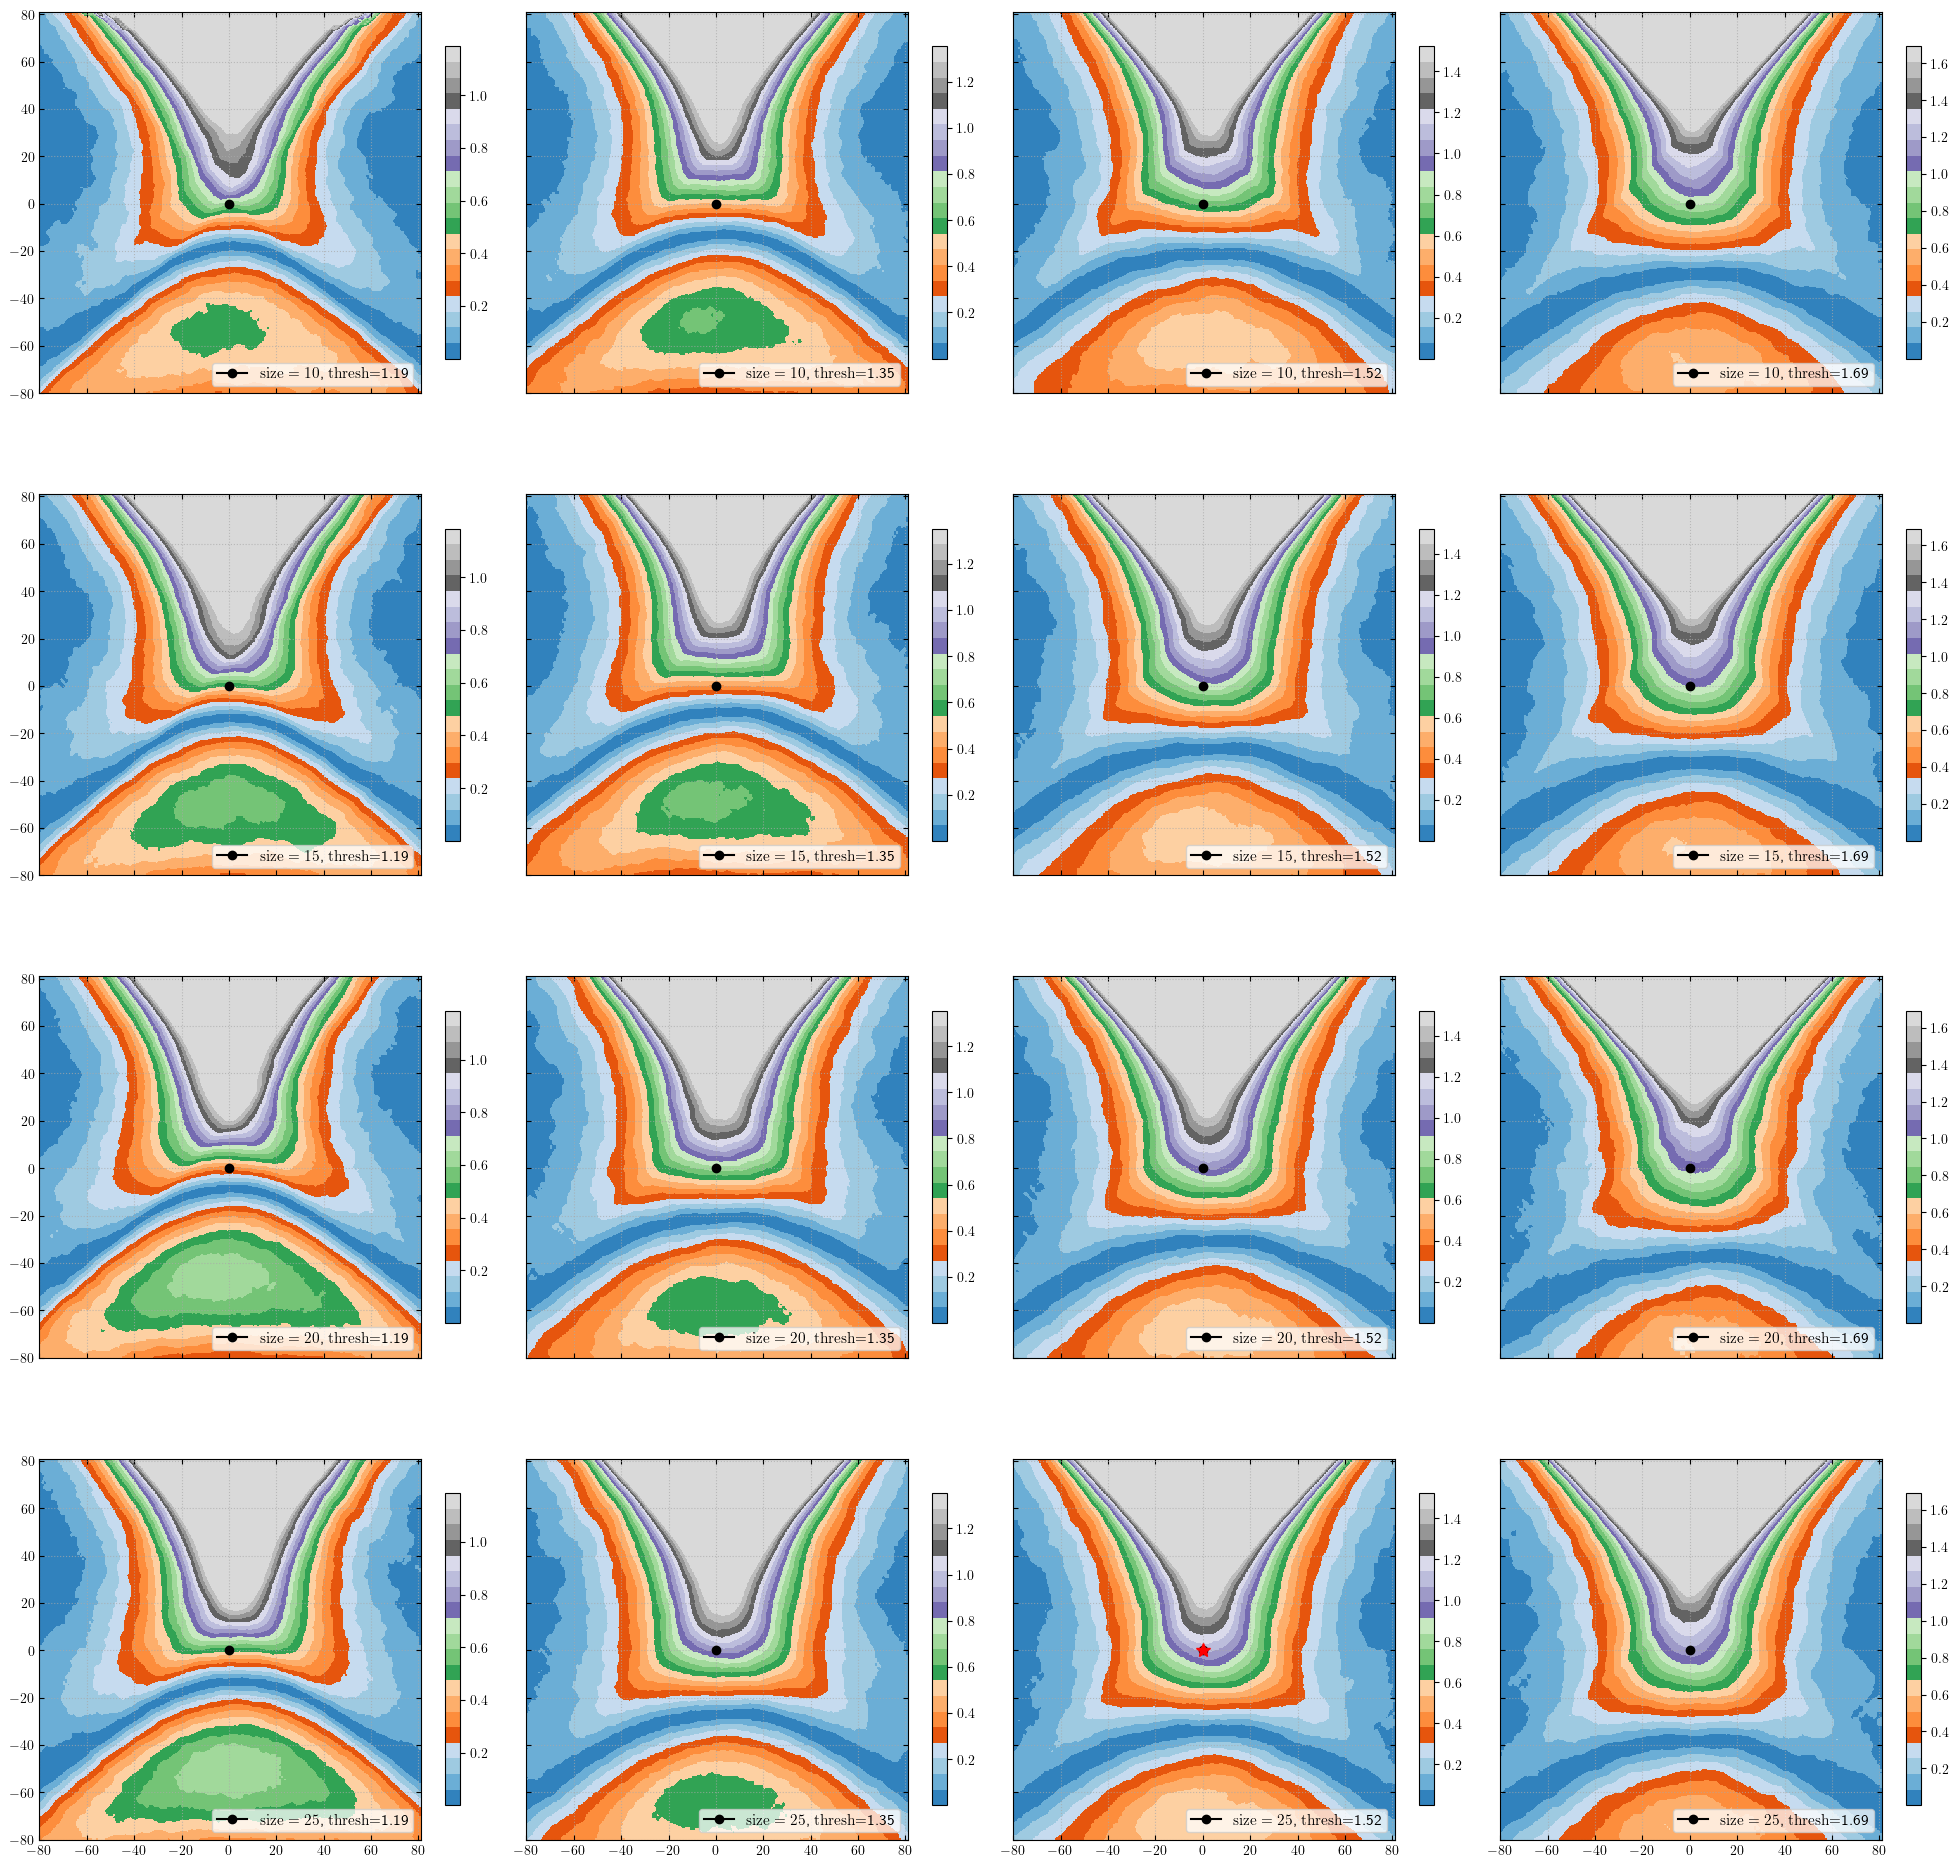

In [6]:
if True:
    tp = 0 # 0 for average, 1 for error
    cp = 0 # 0 - field, 1 - momentum
    delt = 80; print(delt)

    fig, ax = plt.subplots(len(crit_radList), len(crit_threshList), figsize = (len(crit_threshList)*5, len(crit_radList)*5), sharey=True, sharex=True)
    for cind, cth in enumerate(crit_radList):
        for tind, tsh in enumerate(crit_threshList):
            bubble = np.load(average_file(*exp_params)+'_critrad'+str(cth)+'_crittsh'+str(tsh)+'.npy')
            bubble[bubble==0.] = 'nan'

            bubble2measure = np.abs(bubble[tp, cp])
            if cp==0:
                bubble2measure[bubble2measure > tsh] = tsh
            try:
                tcen, xcen = find_nucleation_center(bubble2measure, phieq, tsh, cth)
            except:
                continue
            tcen -= 35
            nT, nN = np.shape(bubble2measure)
            tl,tr = max(0, tcen-delt), min(nT, tcen+delt+1)
            xl,xr = max(0, xcen-delt), min(nN, xcen+delt+1)
            ext = np.array([xl-xcen,xr-xcen,tl-tcen,tr-tcen])

            bubble2plot = bubble2measure[tl:tr,xl:xr]

            im0  = ax[cind,tind].imshow(bubble2plot, extent=ext, interpolation=None, origin='lower', cmap='tab20c')
            clb0 = plt.colorbar(im0, ax = ax[cind,tind], shrink=0.6)
            lab  = r'${{\rm size}}={:.0f}'.format(cth)+r'$, {{\rm thresh}}={:.2f}'.format(tsh)
            ax[cind,tind].plot(0,0, ls=None, marker='o', color='k', label=lab)
            beautify(ax[cind,tind])
            ax[cind,tind].legend(loc=4, fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)

            if tsh == final_crit_thresh and cth == final_crit_rad:
                ax[cind,tind].plot(0., 0., color='red', ms=10, marker='*')

    plt.tight_layout()
    plt.show()

3 2 25 1.522


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Total bubbles included: 277


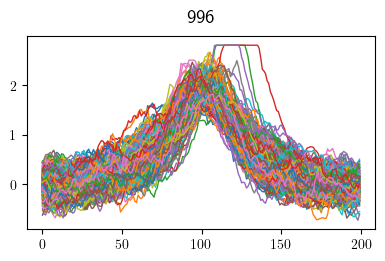

257 simulations for this combination.


/home/dpirvu/project/paper_prefactor/bubble_codes/bubble_tools.py:556: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(whole_bubble, axis=0)
/home/dpirvu/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


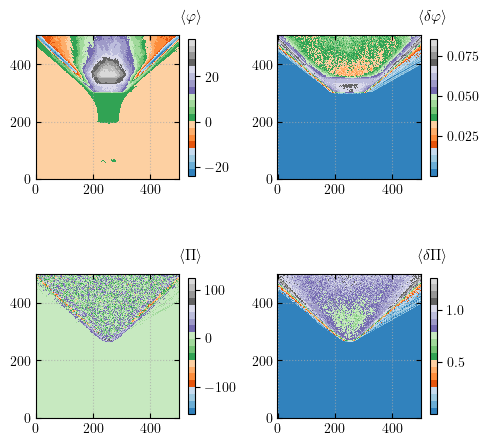

In [7]:
rfin = np.argwhere(crit_radList == final_crit_rad)[0,0]
tfin = np.argwhere(crit_threshList == final_crit_thresh)[0,0]
crit_rad = final_crit_rad
crit_thresh = final_crit_thresh
print(rfin, tfin, crit_rad, crit_thresh)

get_final_averaged = True
if get_final_averaged:
    path = decay_times_file(*exp_params, minSim, maxSim, nTimeMAX)
    if os.path.exists(path):
        decay_times = np.load(path)

        minDecTime = 256
        alltimes   = decay_times[:,1]
        simList2Do = decay_times[alltimes>=minDecTime, 0]

    all_data = []
    fig, ax = plt.subplots(1,1, figsize = (4.5,2.5))
    for sim in simList2Do:
        path2RESTsim = rest_sim_location(*exp_params, sim)
        if os.path.exists(path2RESTsim):
            sim, bubble, totbeta = np.load(path2RESTsim, allow_pickle=True)

            real = np.copy(bubble)
            real = np.abs(real[0])
            real = gaussian_filter(real, 1, mode='nearest')
            nT, nN = np.shape(real)
            tcen, xcen = find_nucleation_center(real, phieq, crit_thresh, crit_rad)
            t, x = np.linspace(-tcen, nT-1-tcen, nT), np.linspace(-xcen, nN-1-xcen, nN)

        #    test = bubble[0, tcen, xcen-50:xcen+50]
        #    if np.nanmean(test) < 0:
        #        bubble = - bubble

            test = bubble[0, tcen, xcen-100:xcen+100]
            plt.plot(test, lw=1)
            plt.title(sim)

            all_data.append(np.array([sim, bubble]))
    print('Total bubbles included:', len(all_data))
    plt.show()

    stacks  = stack_bubbles(all_data, win, phieq, crit_thresh, crit_rad, False)
    avstack = average_stacks(stacks, win, normal, True)
#    np.save(average_file(*exp_params), avstack)


In [8]:
def plot_zoomin(real, threshold=2., winsize=100, title=None):
    real = real[0]
    nT, nN = np.shape(real)
    t_centre, x_centre = find_nucleation_center(real, phieq, crit_thresh, crit_rad)
    tl_stop, tr_stop = int(max(0, t_centre - winsize)), int(min(nT, t_centre + winsize//2))
    xl_stop, xr_stop = int(max(0, x_centre - winsize)), int(min(nN, x_centre + winsize))
    real = real[tl_stop:tr_stop, xl_stop:xr_stop]
    nT, nN = np.shape(real)
    tcen, xcen = find_nucleation_center(real, phieq, crit_thresh, crit_rad)
    t, x = np.linspace(-tcen, nT-1-tcen, nT), np.linspace(-xcen, nN-1-xcen, nN)
    cds = np.abs(real) > threshold
    real[cds] = threshold
    simple_imshow([real], x, t, title=title, contour=False, ret=False)
    return

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


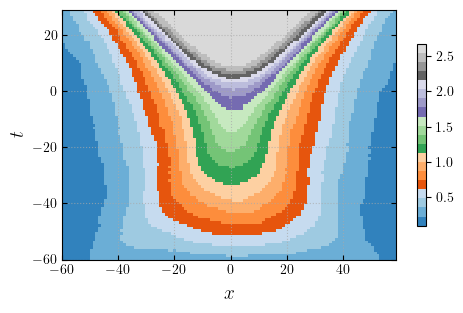

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


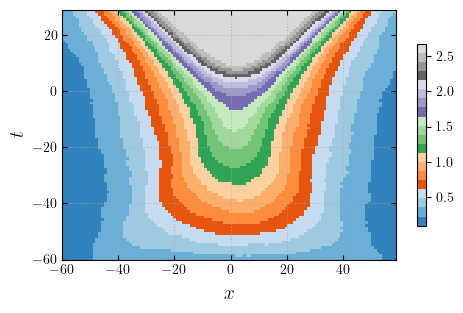

In [9]:
path = average_file(*exp_params)+'_critrad'+str(crit_rad)+'_crittsh'+str(crit_thresh)+'.npy'
average_bubble_filtered = np.load(path)

plot_zoomin(average_bubble_filtered[0], threshold=20, winsize=60)

average_bubble_loaded = np.load(average_file(*exp_params))

plot_zoomin(average_bubble_loaded[0], threshold=20, winsize=60)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


252 250


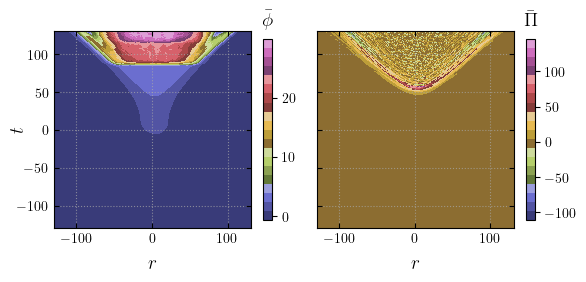

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


251 251


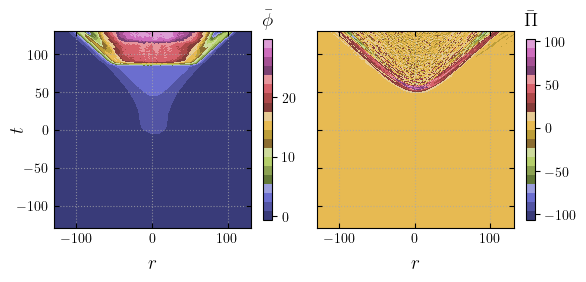

In [10]:
titl = [r'$\bar{\phi}$',  r'$\bar{\Pi}$']

for avbub in [average_bubble_loaded, average_bubble_filtered]:
    bubble2measure = avbub[0][0]
    nT, nN = np.shape(bubble2measure)
    tcen, xcen = find_nucleation_center(bubble2measure, phieq, crit_thresh, crit_rad)
    print(tcen, xcen)

    tcen-= 35
    size = 130
    tl,tr = max(0, tcen-size), min(nT, tcen+size+1)
    xl,xr = max(0, xcen-size), min(nN, xcen+size+1)
    ext = np.array([xl-xcen,xr-xcen,tl-tcen,tr-tcen])

    fig, ax = plt.subplots(1, 2, figsize = (6, 3), sharey=True)
    for cp in range(2):
        # 0 - field, 1 - momentum
        bubble2plot = np.copy(avbub[0][cp,tl:tr,xl:xr])

        im = ax[cp].imshow(bubble2plot, interpolation=None, extent=ext, origin='lower', cmap='tab20b')
        cbar = plt.colorbar(im, ax=ax[cp], shrink=0.7)
        cbar.ax.set_title(titl[cp])

        nT, nN = np.shape(bubble2plot)
        tt = np.linspace(tl-tcen, tr-tcen, nT)
        xx = np.linspace(xl-xcen, xr-xcen, nN)
        ttt1, xxx1 = np.meshgrid(tt, xx)

        lavs = [8, 6][cp]
    #  ax[cp].contour(xxx1, ttt1, bubble2plot.T, levels=lavs, aspect='auto', interpolation=None, extent=ext, origin='lower', colors='k',linewidths=0.5)
        ax[cp].set_xlabel(r'$r$')
    ax[0].set_ylabel(r'$t$')
    beautify(ax, times=-90)
    plt.tight_layout()
    plt.savefig('./plots/average_bubble'+str(temp)+'.pdf')
    plt.show()


252 250


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'


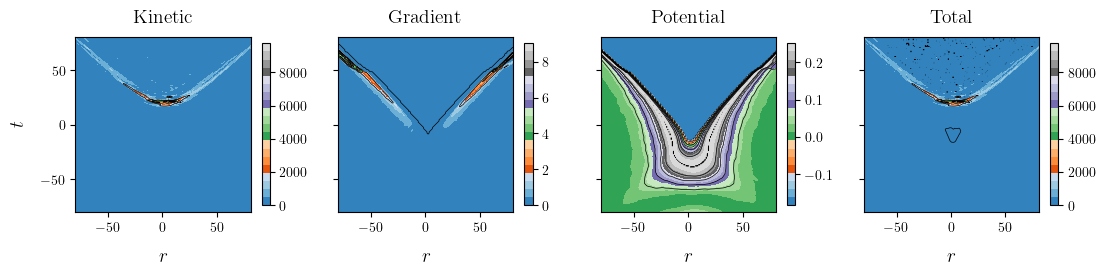

251 251


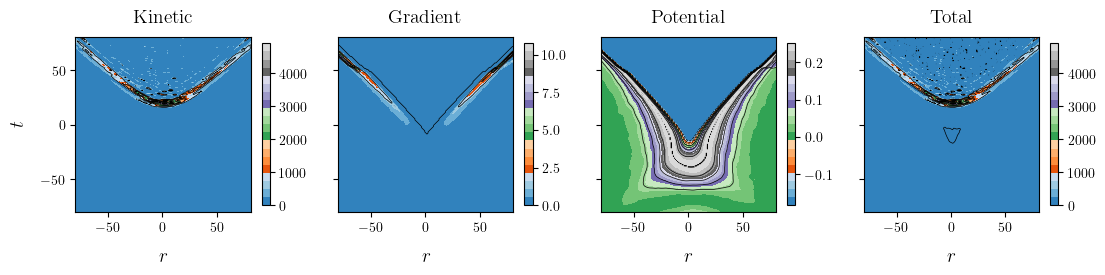

In [11]:
tp = 0# 0 for average, 1 for error

titl = [r'$\bar{\phi}$',  r'$\bar{\Pi}$']

for avbub in [average_bubble_loaded, average_bubble_filtered]:
    bubble2measure = avbub[0][0]
    nT, nN = np.shape(bubble2measure)
    tcen, xcen = find_nucleation_center(bubble2measure, phieq, crit_thresh, crit_rad)
    print(tcen, xcen)
    size = 80
    tl,tr = max(0, tcen-size), min(nT, tcen+size+1)
    xl,xr = max(0, xcen-size), min(nN, xcen+size+1)
    ext = np.array([xl-xcen,xr-xcen,tl-tcen,tr-tcen])

    fld_fld = np.copy(avbub[0][0])
    fld_mom = np.copy(avbub[0][1])

    fld_fld[fld_fld > crit_thresh] = crit_thresh
    fld_fld = gaussian_filter1d(fld_fld, 1, mode='nearest')
    fld_mom = gaussian_filter1d(fld_mom, 1, mode='nearest')

    fld_fld = fld_fld[tl:tr, xl:xr]
    fld_mom = fld_mom[tl:tr, xl:xr]

    kinetic   = 0.5*fld_mom**2.
    gradient  = 0.5*np.gradient(fld_fld, dx)[1]**2.
    potential = V(fld_fld)

    total = kinetic + gradient + potential
    picks = [kinetic, gradient, potential, total]
    titl = [r'$\rm Kinetic$', r'$\rm Gradient$', r'$\rm Potential$', r'$\rm Total$']

    fig, ax = plt.subplots(1, 4, figsize = (13, 3), sharey=True)
    for fi, field in enumerate(picks):

        im = ax[fi].imshow(field, extent=ext, origin='lower', cmap='tab20c')
        cbar = fig.colorbar(im, ax=ax[fi], shrink=0.7)

        nT, nN = np.shape(field)
        tt = np.linspace(tl-tcen, tr-tcen, nT)
        xx = np.linspace(xl-xcen, xr-xcen, nN)
        ttt1, xxx1 = np.meshgrid(tt, xx)
        ax[fi].contour(xxx1, ttt1, field.T, levels=8, aspect='auto', interpolation='none', extent=ext, origin='lower', colors='k', linewidths=0.5)

        ax[fi].set_title(titl[fi])
        ax[fi].set_xlabel(r'$r$')
    ax[0].set_ylabel(r'$t$')
    plt.savefig('./plots/energies.pdf')
    plt.show()
